# Evaluation

## Imports

In [ ]:
import sys
import os

repo_path = os.path.sep.join(os.getcwd().split(os.path.sep)[:-3])
sys.path.append(repo_path)
print(repo_path)
# solves problems for Mac Users
os.chdir(repo_path)


In [55]:
%load_ext autoreload
%autoreload 2

import random
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from clustpy.data.real_torchvision_data import load_mnist, load_usps, load_fmnist
from clustpy.deep.autoencoders import FeedforwardAutoencoder

from practical.DeepClustering.DipECT.dipect import DipECT
from practical.DeepClustering.DipECT.evaluation_pipeline import (
    DatasetType, 
    AutoencoderType, 
    get_dataset
)
from practical.DeepClustering.DipECT.metrics_visualization import (
    visualize_peformance_AE, 
    load_results, 
    show_augmented_data, 
    build_and_visualize_splitindex_tree, 
    build_and_visualize_tree, 
    visualize_axis_for_2_clusters, 
    visualize_axis_after_tree_growth, 
    plot_mean_metrics
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preliminary setting

### Visualizing pretrained autoencoders

##### MNIST

In [ ]:


dataset = get_dataset(DatasetType.MNIST)
data = dataset["data"]
labels = dataset["target"]
visualize_peformance_AE(
    "practical/DeepClustering/DipECT/pretrained_autoencoders/MNIST_autoencoder_10_pretrained_21.pth",
    AutoencoderType.CLUSTPY_STANDARD,
    dataset,
    (28, 28),
    4,
    seed=21,
), visualize_peformance_AE(
    "practical/DeepClustering/DipECT/pretrained_autoencoders/MNIST_stacked_ae_10_pretrained_21.pth",
    AutoencoderType.DEEPECT_STACKED_AE,
    dataset,
    (28, 28),
    4,
    seed=21,
)

##### USPS

In [ ]:
dataset = get_dataset(DatasetType.USPS)
data = dataset["data"]
labels = dataset["target"]
visualize_peformance_AE(
    "practical/DeepClustering/DipECT/pretrained_autoencoders/USPS_autoencoder_10_pretrained_21.pth",
    AutoencoderType.CLUSTPY_STANDARD,
    dataset,
    (16, 16),
    4,
    seed=21,
), 
visualize_peformance_AE(
    "practical/DeepClustering/DipECT/pretrained_autoencoders/USPS_stacked_ae_10_pretrained_21.pth",
    AutoencoderType.DEEPECT_STACKED_AE,
    dataset,
    (16, 16),
    4,
    seed=21,
)

##### FMNIST

In [ ]:
dataset = get_dataset(DatasetType.FASHION_MNIST)
data = dataset["data"] 
labels = dataset["target"]
visualize_peformance_AE(
    "practical/DeepClustering/DipECT/pretrained_autoencoders/FashionMNIST_autoencoder_10_pretrained_21.pth",
    AutoencoderType.CLUSTPY_STANDARD,
    dataset,
    (28, 28),
    4,
    seed=21,
), visualize_peformance_AE(
    "practical/DeepClustering/DipECT/pretrained_autoencoders/FashionMNIST_stacked_ae_10_pretrained_21.pth",
    AutoencoderType.DEEPECT_STACKED_AE,
    dataset,
    (28, 28),
    4,
    seed=21,
)

### Visualization of augmented data

##### MNIST

In [ ]:
dataset = get_dataset(DatasetType.MNIST)
data = dataset["data"]
labels = dataset["target"]
show_augmented_data(data, DatasetType.MNIST, (28, 28), 4)

##### USPS

In [ ]:
dataset = get_dataset(DatasetType.USPS)
data = dataset["data"]
labels = dataset["target"]
show_augmented_data(data, DatasetType.USPS, (16, 16), 4)

##### FMNIST

In [ ]:
dataset = get_dataset(DatasetType.FASHION_MNIST)
data = dataset["data"]
labels = dataset["target"]
show_augmented_data(data, DatasetType.FASHION_MNIST, (28,28), 4)

## DipECT Evaluation

#### MNIST

In [ ]:
dataset, labels = load_mnist(return_X_y=True)
autoencoder = FeedforwardAutoencoder([dataset.shape[1], 500, 500, 2000, 10])
autoencoder.load_state_dict(torch.load("./practical/DeepClustering/DipECT/pretrained_AE_test.pth")) #TODO: Adjust path here!
autoencoder.fitted = True

dipect = DipECT(autoencoder=autoencoder, grow_interval=2, max_epochs=45, pruning_threshold=0.01, consider_num_assignments_for_growing=True)
dipect = dipect.fit_predict(dataset)

In [ ]:
print('MNIST:')
print('Accuracy:', dipect.tree_.flat_accuracy(labels, 10))
print('NMI:', dipect.tree_.flat_nmi(labels, 10))
print('Dendrogram Purity:', dipect.tree_.dendrogram_purity(labels))


#### USPS

In [ ]:
dataset, labels = load_usps(return_X_y=True)
autoencoder = FeedforwardAutoencoder([dataset.shape[1], 500, 500, 2000, 10])
autoencoder.load_state_dict(torch.load("./practical/DeepClustering/DipECT/pretrained_AE_usps.pth"))
autoencoder.fitted = True

dipect = DipECT(autoencoder=autoencoder, grow_interval=2, max_epochs=100, pruning_threshold=0.01, consider_num_assignments_for_growing=True)
dipect = dipect.fit_predict(dataset)

In [ ]:
print('Fashion USPS:')
print('Accuracy:', dipect.tree_.flat_accuracy(labels, 10))
print('NMI:', dipect.tree_.flat_nmi(labels, 10))
print('Dendrogram Purity:', dipect.tree_.dendrogram_purity(labels))


#### Fashion-MNIST

In [ ]:
dataset, labels = load_fmnist(return_X_y=True)
autoencoder = FeedforwardAutoencoder([dataset.shape[1], 500, 500, 2000, 10])
autoencoder.load_state_dict(torch.load("./practical/DeepClustering/DipECT/pretrained_AE_fmnist.pth"))
autoencoder.fitted = True

dipect = DipECT(autoencoder=autoencoder, grow_interval=2, max_epochs=45, pruning_threshold=0.01, consider_num_assignments_for_growing=True)
dipect = dipect.fit_predict(dataset)

In [ ]:
print('Fashion MNIST:')
print('Accuracy:', dipect.tree_.flat_accuracy(labels, 10))
print('NMI:', dipect.tree_.flat_nmi(labels, 10))
print('Dendrogram Purity:', dipect.tree_.dendrogram_purity(labels))


### Axis Visualization

#### For 2 clusters

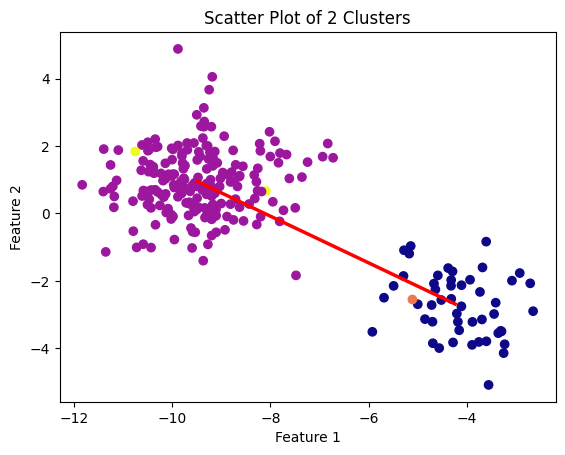

In [31]:
X1, y1 = make_blobs(n_samples=50, centers=1,)
X2, y2 = make_blobs(n_samples=200, centers=1, )
visualize_axis_for_2_clusters(X1, X2, y1, y2)

#### After tree growth

#assignments:  200
#assignments:  400
#assignments best node:  400
True


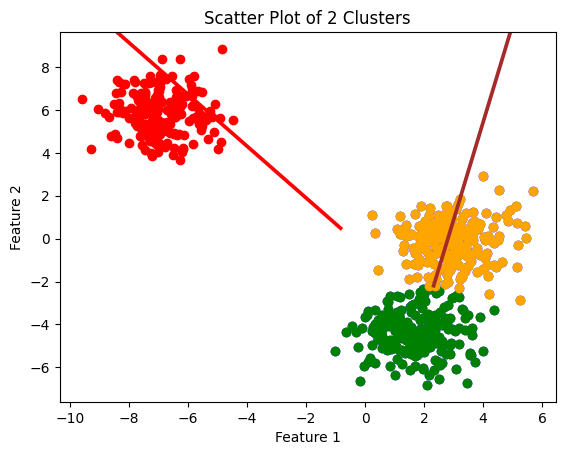

In [22]:
X, _ = make_blobs(n_samples=600, centers=3)
visualize_axis_after_tree_growth(X)

### Tree Visualization

#### Splitindex Tree

In [ ]:
build_and_visualize_splitindex_tree(dipect.tree_.root)

#### Image Tree

In [ ]:
build_and_visualize_tree(dipect.tree_.root, dipect.autoencoder, dataset)

### Metrics visualization

#### Loss

For each dataset over multiple seeds (mean)

##### MNIST

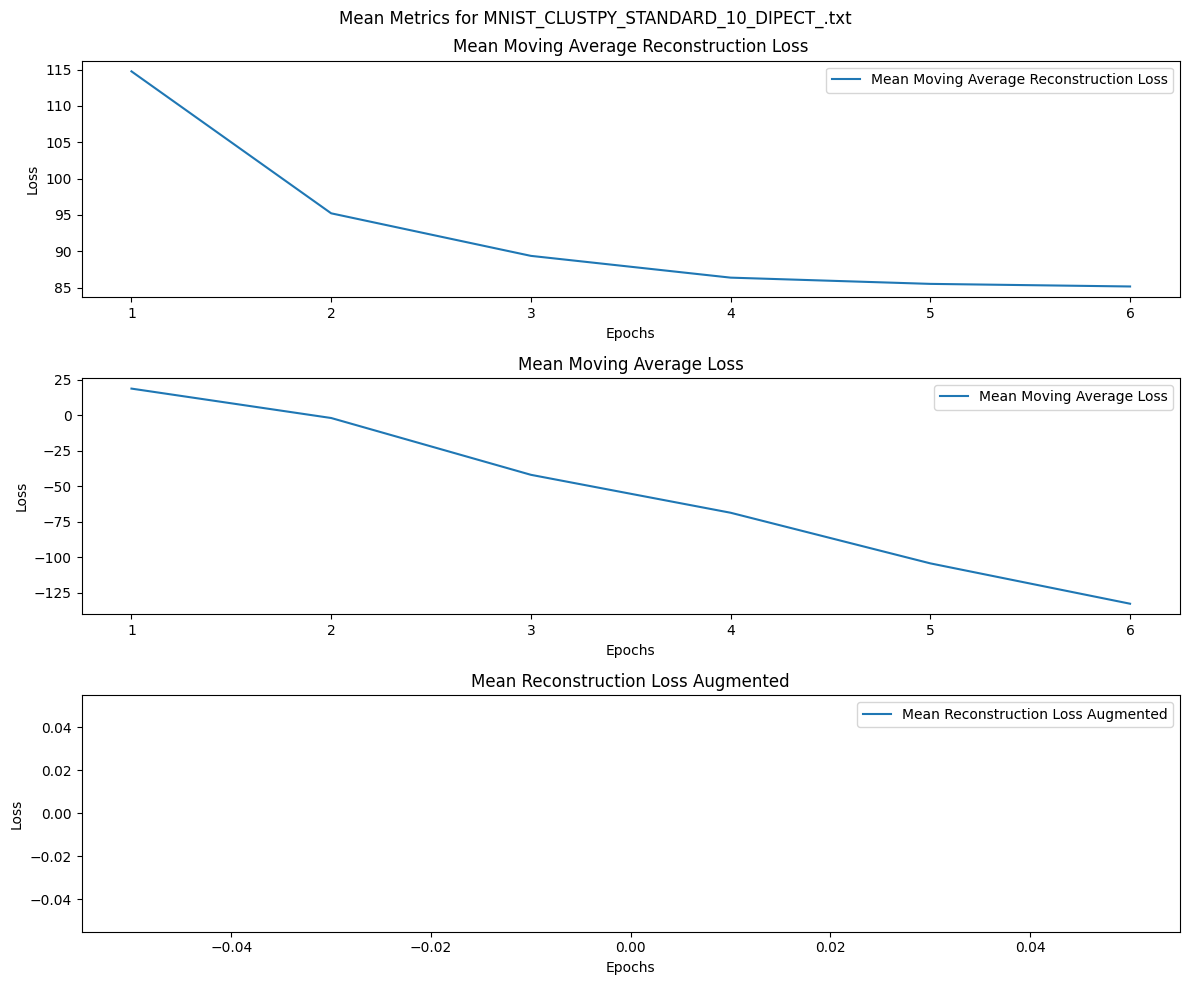

In [17]:
relative_path = "practical/DeepClustering/DipECT/results_log/"
file_pattern = "MNIST_CLUSTPY_STANDARD_10_DIPECT_*.txt"
plot_mean_metrics(relative_path, file_pattern)

##### Fashion-MNIST

In [ ]:
relative_path = "practical/DeepClustering/DipECT/results_log/"
file_pattern = "FashionMNIST_CLUSTPY_STANDARD_10_DIPECT_*.txt"
plot_mean_metrics(relative_path, file_pattern)

##### REUTERS

In [ ]:
relative_path = "practical/DeepClustering/DipECT/results_log/"
file_pattern = "Reuters_CLUSTPY_STANDARD_10_DIPECT_*.txt"
plot_mean_metrics(relative_path, file_pattern)

##### USPS

In [ ]:
relative_path = "practical/DeepClustering/DipECT/results_log/"
file_pattern = "USPS_CLUSTPY_STANDARD_10_DIPECT_*.txt"
plot_mean_metrics(relative_path, file_pattern)

## Results

In [ ]:
(
    flat_results,
    flat_combined,
    flat_results_html,
    hierarchical_results,
    hierarchical_combined,
    hierarchical_results_html,
) = load_results()

### DipECT Only

In [ ]:
deepect_filtered = flat_combined[flat_combined["method"].str.startswith("DeepECT")]

### Flat Results Comparison

In [ ]:
flat_results_html

### Hierarchical Results Comparison

In [ ]:
hierarchical_results_html